# Intensive Margin Labor Supply Choice

In [1]:
from time import process_time

import matplotlib.pyplot as plt
import numpy as np

from HARK.ConsumptionSaving.ConsLaborModel import (
    LaborIntMargConsumerType,
    init_labor_lifecycle,
)

In [2]:
mystr = lambda number: f"{number:.4f}"  # Format numbers as strings

In [3]:
do_simulation = True

In [4]:
# Make and solve a labor intensive margin consumer i.e. a consumer with utility for leisure
LaborIntMargExample = LaborIntMargConsumerType(verbose=0)
LaborIntMargExample.cycles = 0

/opt/hostedtoolcache/Python/3.10.19/x64/lib/python3.10/site-packages/HARK/ConsumptionSaving/ConsLaborModel.py:147: RuntimeWarning: divide by zero encountered in divide
  * (bNrmGridTerm / (WageRte_T * TranShkGridTerm) + 1.0),
/opt/hostedtoolcache/Python/3.10.19/x64/lib/python3.10/site-packages/HARK/ConsumptionSaving/ConsLaborModel.py:147: RuntimeWarning: invalid value encountered in divide
  * (bNrmGridTerm / (WageRte_T * TranShkGridTerm) + 1.0),
/opt/hostedtoolcache/Python/3.10.19/x64/lib/python3.10/site-packages/HARK/rewards.py:79: RuntimeWarning: divide by zero encountered in power
  return c**-rho


In [5]:
t_start = process_time()
LaborIntMargExample.solve()
t_end = process_time()
print(
    "Solving a labor intensive margin consumer took "
    + str(t_end - t_start)
    + " seconds.",
)

Solving a labor intensive margin consumer took 1.058716713 seconds.


In [6]:
t = 0
bMin_orig = 0.0
bMax = 20.0

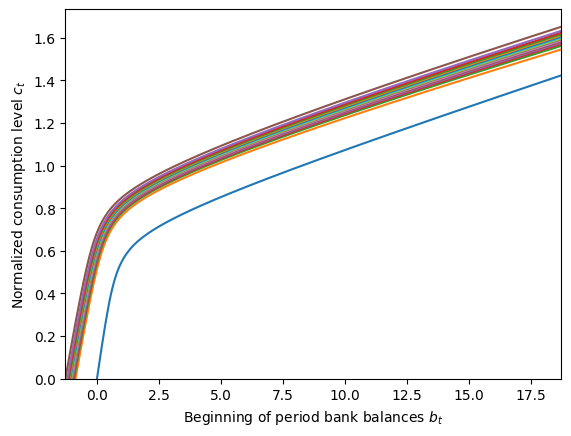

In [7]:
# Plot the consumption function at various transitory productivity shocks
TranShkSet = LaborIntMargExample.TranShkGrid[t]
bMin = bMin_orig
B = np.linspace(bMin, bMax, 300)
bMin = bMin_orig
for Shk in TranShkSet:
    B_temp = B + LaborIntMargExample.solution[t].bNrmMin(Shk)
    C = LaborIntMargExample.solution[t].cFunc(B_temp, Shk * np.ones_like(B_temp))
    plt.plot(B_temp, C)
    bMin = np.minimum(bMin, B_temp[0])
plt.xlabel(r"Beginning of period bank balances $b_t$")
plt.ylabel(r"Normalized consumption level $c_t$")
plt.xlim(bMin, bMax - bMin_orig + bMin)
plt.ylim(0.0, None)
plt.show()

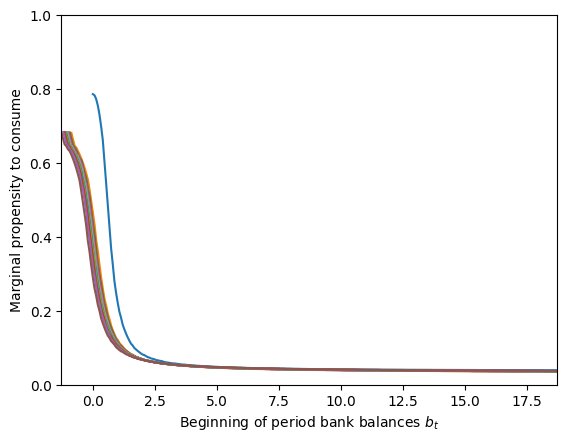

In [8]:
# Plot the marginal consumption function at various transitory productivity shocks
TranShkSet = LaborIntMargExample.TranShkGrid[t]
bMin = bMin_orig
B = np.linspace(bMin, bMax, 300)
for Shk in TranShkSet:
    B_temp = B + LaborIntMargExample.solution[t].bNrmMin(Shk)
    C = LaborIntMargExample.solution[t].cFunc.derivativeX(
        B_temp,
        Shk * np.ones_like(B_temp),
    )
    plt.plot(B_temp, C)
    bMin = np.minimum(bMin, B_temp[0])
plt.xlabel(r"Beginning of period bank balances $b_t$")
plt.ylabel(r"Marginal propensity to consume")
plt.xlim(bMin, bMax - bMin_orig + bMin)
plt.ylim(0.0, 1.0)
plt.show()

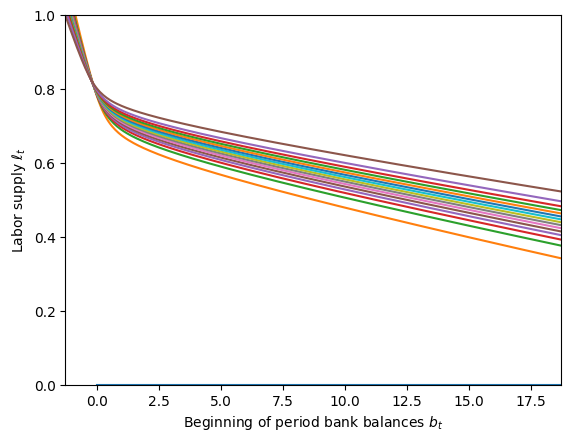

In [9]:
# Plot the labor function at various transitory productivity shocks
TranShkSet = LaborIntMargExample.TranShkGrid[t]
bMin = bMin_orig
B = np.linspace(0.0, bMax, 300)
for Shk in TranShkSet:
    B_temp = B + LaborIntMargExample.solution[t].bNrmMin(Shk)
    Lbr = LaborIntMargExample.solution[t].LbrFunc(B_temp, Shk * np.ones_like(B_temp))
    bMin = np.minimum(bMin, B_temp[0])
    plt.plot(B_temp, Lbr)
plt.xlabel(r"Beginning of period bank balances $b_t$")
plt.ylabel(r"Labor supply $\ell_t$")
plt.xlim(bMin, bMax - bMin_orig + bMin)
plt.ylim(0.0, 1.0)
plt.show()

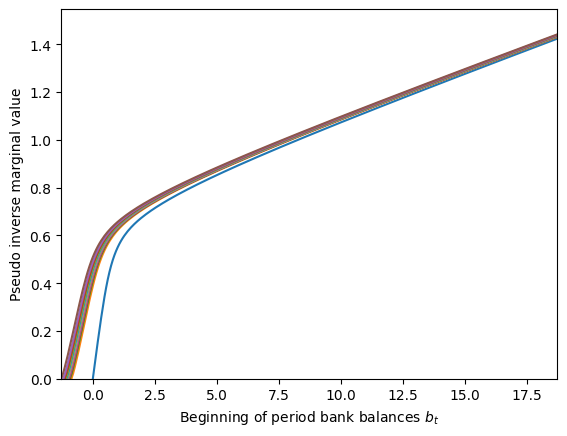

In [10]:
# Plot the marginal value function at various transitory productivity shocks
pseudo_inverse = True
TranShkSet = LaborIntMargExample.TranShkGrid[t]
bMin = bMin_orig
B = np.linspace(0.0, bMax, 300)
for Shk in TranShkSet:
    B_temp = B + LaborIntMargExample.solution[t].bNrmMin(Shk)
    if pseudo_inverse:
        vP = LaborIntMargExample.solution[t].vPfunc.cFunc(
            B_temp,
            Shk * np.ones_like(B_temp),
        )
    else:
        vP = LaborIntMargExample.solution[t].vPfunc(B_temp, Shk * np.ones_like(B_temp))
    bMin = np.minimum(bMin, B_temp[0])
    plt.plot(B_temp, vP)
plt.xlabel(r"Beginning of period bank balances $b_t$")
if pseudo_inverse:
    plt.ylabel("Pseudo inverse marginal value")
else:
    plt.ylabel("Marginal value")
plt.xlim(bMin, bMax - bMin_orig + bMin)
plt.ylim(0.0, None)
plt.show()

Simulating 10000 intensive-margin labor supply consumers for 120 periods took 2.3685 seconds.


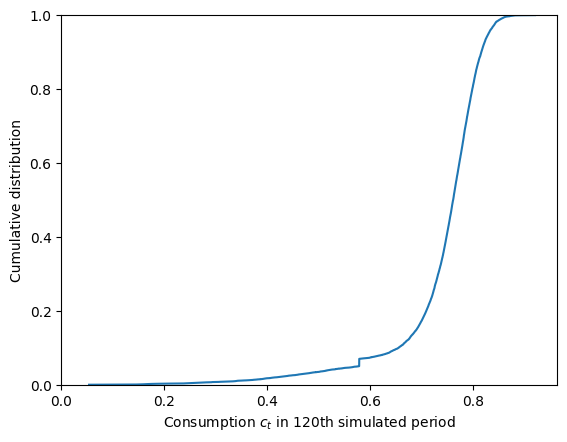

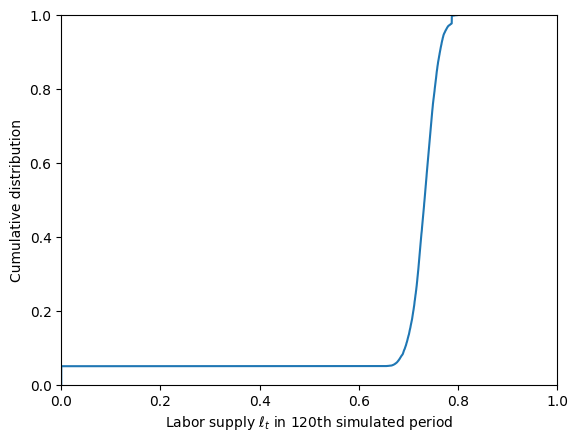

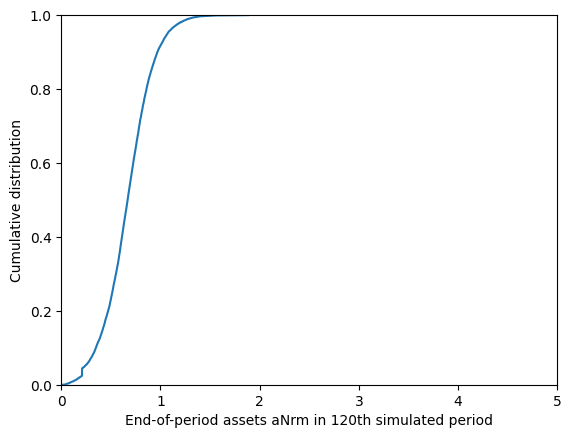

In [11]:
if do_simulation:
    t_start = process_time()
    LaborIntMargExample.T_sim = 120  # Set number of simulation periods
    LaborIntMargExample.track_vars = ["bNrm", "cNrm"]
    LaborIntMargExample.initialize_sim()
    LaborIntMargExample.simulate()
    t_end = process_time()
    print(
        "Simulating "
        + str(LaborIntMargExample.AgentCount)
        + " intensive-margin labor supply consumers for "
        + str(LaborIntMargExample.T_sim)
        + " periods took "
        + mystr(t_end - t_start)
        + " seconds.",
    )

    N = LaborIntMargExample.AgentCount
    CDF = np.linspace(0.0, 1, N)

    plt.plot(np.sort(LaborIntMargExample.controls["cNrm"]), CDF)
    plt.xlabel(
        r"Consumption $c_t$ in "
        + str(LaborIntMargExample.T_sim)
        + "th simulated period",
    )
    plt.ylabel("Cumulative distribution")
    plt.xlim(0.0, None)
    plt.ylim(0.0, 1.0)
    plt.show()

    plt.plot(np.sort(LaborIntMargExample.controls["Lbr"]), CDF)
    plt.xlabel(
        r"Labor supply $\ell_t$ in "
        + str(LaborIntMargExample.T_sim)
        + "th simulated period",
    )
    plt.ylabel("Cumulative distribution")
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.0)
    plt.show()

    plt.plot(np.sort(LaborIntMargExample.state_now["aNrm"]), CDF)
    plt.xlabel(
        "End-of-period assets aNrm in "
        + str(LaborIntMargExample.T_sim)
        + "th simulated period",
    )
    plt.ylabel("Cumulative distribution")
    plt.xlim(0.0, 5.0)
    plt.ylim(0.0, 1.0)
    plt.show()

In [12]:
# Make and solve a labor intensive margin consumer with a finite lifecycle
LifecycleExample = LaborIntMargConsumerType(**init_labor_lifecycle)
LifecycleExample.cycles = (
    1  # Make this consumer live a sequence of periods exactly once
)

In [13]:
start_time = process_time()
LifecycleExample.solve()
end_time = process_time()
print(
    "Solving a lifecycle labor intensive margin consumer took "
    + str(end_time - start_time)
    + " seconds.",
)
LifecycleExample.unpack("cFunc")

Solving a lifecycle labor intensive margin consumer took 0.048699539000001124 seconds.


In [14]:
bMax = 20.0

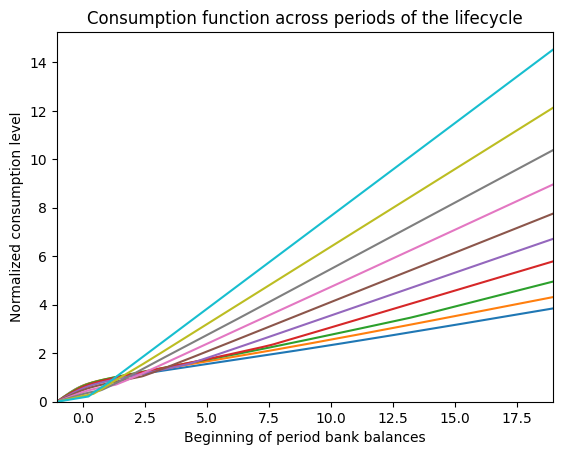

In [15]:
# Plot the consumption function in each period of the lifecycle, using median shock
B = np.linspace(0.0, bMax, 300)
b_min = np.inf
b_max = -np.inf
for t in range(LifecycleExample.T_cycle):
    TranShkSet = LifecycleExample.TranShkGrid[t]
    Shk = TranShkSet[int(len(TranShkSet) // 2)]  # Use the median shock, more or less
    B_temp = B + LifecycleExample.solution[t].bNrmMin(Shk)
    C = LifecycleExample.solution[t].cFunc(B_temp, Shk * np.ones_like(B_temp))
    plt.plot(B_temp, C)
    b_min = np.minimum(b_min, B_temp[0])
    b_max = np.maximum(b_min, B_temp[-1])
plt.title("Consumption function across periods of the lifecycle")
plt.xlabel("Beginning of period bank balances")
plt.ylabel("Normalized consumption level")
plt.xlim(b_min, b_max)
plt.ylim(0.0, None)
plt.show()

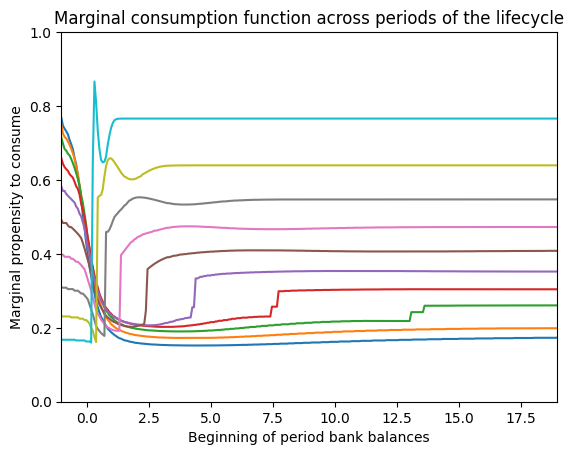

In [16]:
# Plot the marginal consumption function in each period of the lifecycle, using median shock
B = np.linspace(0.0, bMax, 300)
b_min = np.inf
b_max = -np.inf
for t in range(LifecycleExample.T_cycle):
    TranShkSet = LifecycleExample.TranShkGrid[t]
    Shk = TranShkSet[int(len(TranShkSet) // 2)]  # Use the median shock, more or less
    B_temp = B + LifecycleExample.solution[t].bNrmMin(Shk)
    MPC = LifecycleExample.solution[t].cFunc.derivativeX(
        B_temp,
        Shk * np.ones_like(B_temp),
    )
    plt.plot(B_temp, MPC)
    b_min = np.minimum(b_min, B_temp[0])
    b_max = np.maximum(b_min, B_temp[-1])
plt.title("Marginal consumption function across periods of the lifecycle")
plt.xlabel("Beginning of period bank balances")
plt.ylabel("Marginal propensity to consume")
plt.xlim(b_min, b_max)
plt.ylim(0.0, 1.0)
plt.show()

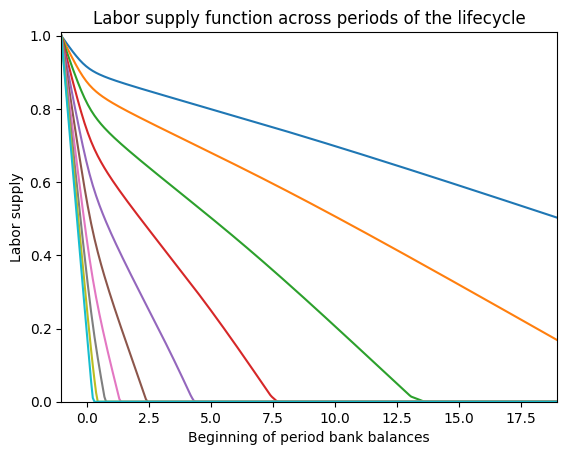

In [17]:
# Plot the labor supply function in each period of the lifecycle, using median shock
B = np.linspace(0.0, bMax, 300)
b_min = np.inf
b_max = -np.inf
for t in range(LifecycleExample.T_cycle):
    TranShkSet = LifecycleExample.TranShkGrid[t]
    Shk = TranShkSet[int(len(TranShkSet) // 2)]  # Use the median shock, more or less
    B_temp = B + LifecycleExample.solution[t].bNrmMin(Shk)
    L = LifecycleExample.solution[t].LbrFunc(B_temp, Shk * np.ones_like(B_temp))
    plt.plot(B_temp, L)
    b_min = np.minimum(b_min, B_temp[0])
    b_max = np.maximum(b_min, B_temp[-1])
plt.title("Labor supply function across periods of the lifecycle")
plt.xlabel("Beginning of period bank balances")
plt.ylabel("Labor supply")
plt.xlim(b_min, b_max)
plt.ylim(0.0, 1.01)
plt.show()

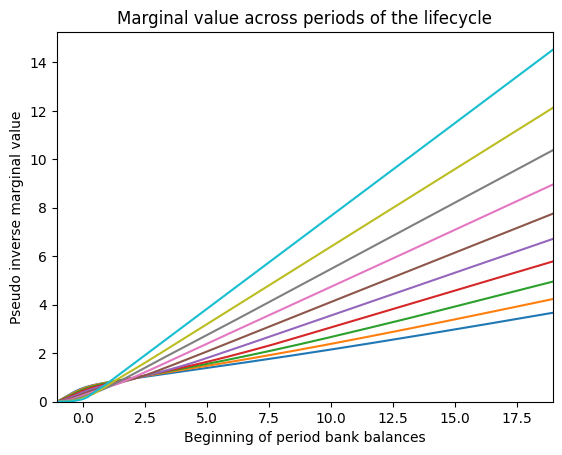

In [18]:
# Plot the marginal value function at various transitory productivity shocks
pseudo_inverse = True
TranShkSet = LifecycleExample.TranShkGrid[t]
B = np.linspace(0.0, bMax, 300)
b_min = np.inf
b_max = -np.inf
for t in range(LifecycleExample.T_cycle):
    TranShkSet = LifecycleExample.TranShkGrid[t]
    Shk = TranShkSet[int(len(TranShkSet) / 2)]  # Use the median shock, more or less
    B_temp = B + LifecycleExample.solution[t].bNrmMin(Shk)
    if pseudo_inverse:
        vP = LifecycleExample.solution[t].vPfunc.cFunc(
            B_temp,
            Shk * np.ones_like(B_temp),
        )
    else:
        vP = LifecycleExample.solution[t].vPfunc(B_temp, Shk * np.ones_like(B_temp))
    plt.plot(B_temp, vP)
    b_min = np.minimum(b_min, B_temp[0])
    b_max = np.maximum(b_min, B_temp[-1])
plt.xlabel("Beginning of period bank balances")
if pseudo_inverse:
    plt.ylabel("Pseudo inverse marginal value")
else:
    plt.ylabel("Marginal value")
plt.title("Marginal value across periods of the lifecycle")
plt.xlim(b_min, b_max)
plt.ylim(0.0, None)
plt.show()